In [1]:
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import projgrad
plt.style.use('../peptidome.mplstyle')

from lib import *

In [2]:
codon_map = {"UUU":"F", "UUC":"F", "UUA":"L", "UUG":"L",
    "UCU":"S", "UCC":"S", "UCA":"S", "UCG":"S",
    "UAU":"Y", "UAC":"Y", "UAA":"STOP", "UAG":"STOP",
    "UGU":"C", "UGC":"C", "UGA":"STOP", "UGG":"W",
    "CUU":"L", "CUC":"L", "CUA":"L", "CUG":"L",
    "CCU":"P", "CCC":"P", "CCA":"P", "CCG":"P",
    "CAU":"H", "CAC":"H", "CAA":"Q", "CAG":"Q",
    "CGU":"R", "CGC":"R", "CGA":"R", "CGG":"R",
    "AUU":"I", "AUC":"I", "AUA":"I", "AUG":"M",
    "ACU":"T", "ACC":"T", "ACA":"T", "ACG":"T",
    "AAU":"N", "AAC":"N", "AAA":"K", "AAG":"K",
    "AGU":"S", "AGC":"S", "AGA":"R", "AGG":"R",
    "GUU":"V", "GUC":"V", "GUA":"V", "GUG":"V",
    "GCU":"A", "GCC":"A", "GCA":"A", "GCG":"A",
    "GAU":"D", "GAC":"D", "GAA":"E", "GAG":"E",
    "GGU":"G", "GGC":"G", "GGA":"G", "GGG":"G",}

In [3]:
fluA = datadir + proteomes.loc['InfluenzaA']['path']
df = counter_to_df(count_kmers_proteome(human, 1), norm=True)
df = df.set_index('seq')
df = df.sort_index()

In [4]:
nt_to_ind = {
    'A' : 0,
    'C' : 1,
    'G' : 2,
    'U' : 3 
    }
def calc_frequencies(p):
    frequencies = {aa:0 for aa in df.index}
    for nts, aa in codon_map.items():
        if not aa == 'STOP':
            frequencies[aa] += np.prod([p[nt_to_ind[nt]] for nt in nts])
    return frequencies

1.0


0.01109111327904973

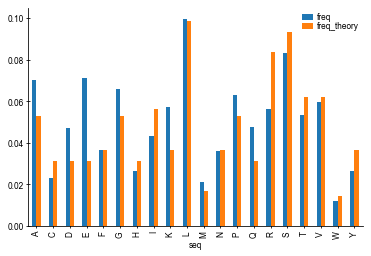

In [5]:
p = [0.27, 0.23, 0.23, 0.27]
#p = np.ones(4)
p /= np.sum(p)
print(np.sum(p))
frequencies = calc_frequencies(p)
df_theory = pd.DataFrame.from_dict(frequencies, orient='index', columns=['freq_theory'])
dfm = df.merge(df_theory, left_index=True, right_index=True)
dfm.plot(kind='bar')

calc_jsd(dfm['freq'], dfm['freq_theory'])

In [6]:
def fun(p, epsilon = 1e-8):
    def f(p):
        frequencies = calc_frequencies(p)
        df_theory = pd.DataFrame.from_dict(frequencies, orient='index', columns=['freq_theory'])
        dfm = df.merge(df_theory, left_index=True, right_index=True)
        return calc_jsd(dfm['freq'], dfm['freq_theory'])
    return f(p), scipy.optimize.approx_fprime(p, f, epsilon)
res = projgrad.minimize(fun, np.ones(4)/4.0)
res

       x: array([0.29563726, 0.21821714, 0.2498734 , 0.23627219])
     fun: 0.008641217018279268
     nit: 100
 success: True

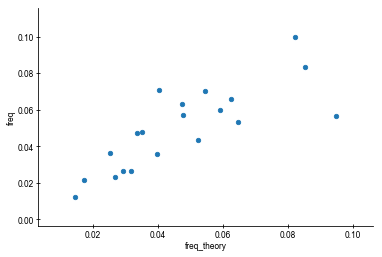

In [7]:
frequencies = calc_frequencies(res.x)
df_theory = pd.DataFrame.from_dict(frequencies, orient='index', columns=['freq_theory'])
dfm = df.merge(df_theory, left_index=True, right_index=True)
dfm.plot(kind='scatter', x='freq_theory', y='freq')